In [10]:
import numpy as np
import pandas as pd

In [12]:
df=pd.read_csv('placement.csv')

In [7]:
df.head()


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [13]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


##Process

# Step 1-Preprocessing+ EDA+ Scatterplot example+ Feature Selection
# Step 2- Extracting Input and Output columns
# Step 3- Train Test Split
# Step 4- Evaluating the model
# Step 5-Accuracy Score
# Step 6- Exporting the Model
# Step 7- Deploying the Model on Cloud

In [15]:
#preprocessing : we need to remove only unnamed:0 columns since there is no empty values
df.iloc[:,1:]

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


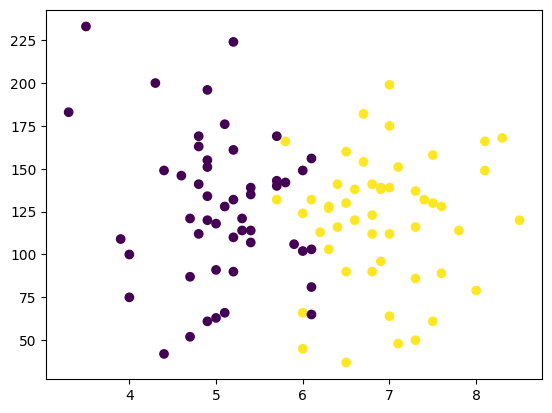

In [16]:
#EDA Exploratory Data Analysis
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [19]:
#feature selection : ignoring

In [18]:
#Extract I/p and o/p variables
#i/p

X=df.iloc[:,0:2]
Y=df.iloc[:,-1]

In [19]:
X

,Unnamed: 0,cgpa
0,0,6.8
1,1,5.9
2,2,5.3
3,3,7.4
4,4,5.8
...,...,...
95,95,4.3
96,96,4.4
97,97,6.7
98,98,6.3


In [20]:
Y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


Train Test Split


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.1)

In [52]:
X_train

array([[-0.21952192,  1.28383855],
       [-1.01394567,  0.93396582],
       [ 0.5058215 ,  1.80864765],
       [-0.84124485,  0.84649764],
       [-0.94486534, -1.16527057],
       [-1.46296779,  0.05928399],
       [-1.04848583,  0.49662491],
       [-0.18498176, -0.02818419],
       [ 1.43840589, -0.72792966],
       [-0.56492355, -1.07780239],
       [-1.56658827,  0.93396582],
       [-1.15210632, -2.38982513],
       [ 1.19662475, -0.20312056],
       [-0.25406209,  0.67156127],
       [ 0.43674117,  0.23422036],
       [-0.4267629 ,  0.40915672],
       [ 0.64398215,  2.15852038],
       [-0.04682111, -0.55299329],
       [-0.53038339,  0.67156127],
       [ 0.22950019,  0.40915672],
       [-0.77216453, -0.72792966],
       [-1.49750795, -0.90286602],
       [-0.32314241, -0.55299329],
       [ 0.47128133,  0.84649764],
       [-1.29026697,  0.32168854],
       [-0.63400388,  0.84649764],
       [ 0.85122312, -1.07780239],
       [-0.66854404, -1.86501604],
       [ 0.26404036,

In [53]:
Y_train

,placement
44,1
21,1
65,1
26,1
23,0
...,...
14,0
95,0
97,1
80,0


In [54]:
#scaling
from sklearn.preprocessing import StandardScaler

In [55]:
scaler=StandardScaler()

In [56]:
X_train =scaler.fit_transform(X_train)

In [57]:
X_train

array([[-0.21952192,  1.28383855],
       [-1.01394567,  0.93396582],
       [ 0.5058215 ,  1.80864765],
       [-0.84124485,  0.84649764],
       [-0.94486534, -1.16527057],
       [-1.46296779,  0.05928399],
       [-1.04848583,  0.49662491],
       [-0.18498176, -0.02818419],
       [ 1.43840589, -0.72792966],
       [-0.56492355, -1.07780239],
       [-1.56658827,  0.93396582],
       [-1.15210632, -2.38982513],
       [ 1.19662475, -0.20312056],
       [-0.25406209,  0.67156127],
       [ 0.43674117,  0.23422036],
       [-0.4267629 ,  0.40915672],
       [ 0.64398215,  2.15852038],
       [-0.04682111, -0.55299329],
       [-0.53038339,  0.67156127],
       [ 0.22950019,  0.40915672],
       [-0.77216453, -0.72792966],
       [-1.49750795, -0.90286602],
       [-0.32314241, -0.55299329],
       [ 0.47128133,  0.84649764],
       [-1.29026697,  0.32168854],
       [-0.63400388,  0.84649764],
       [ 0.85122312, -1.07780239],
       [-0.66854404, -1.86501604],
       [ 0.26404036,

In [58]:
X_test=scaler.transform(X_test)

In [68]:
X_test

array([[47. ,  5.2],
       [ 2. ,  5.3],
       [60. ,  6.9],
       [11. ,  6.9],
       [24. ,  4.7],
       [62. ,  6. ],
       [50. ,  3.5],
       [71. ,  6.1],
       [ 9. ,  5.1],
       [82. ,  6.5]])

In [69]:
#model
from sklearn.linear_model import LogisticRegression

In [70]:
clf=LogisticRegression()

In [71]:
#model training
clf.fit(X_train,Y_train)

LogisticRegression()

In [75]:
Y_pred= clf.predict(X_test)

In [76]:
Y_test

,placement
47,0
2,0
60,1
11,1
24,0
62,0
50,0
71,1
9,0
82,1


In [77]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(Y_test,Y_pred)

0.4

In [80]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

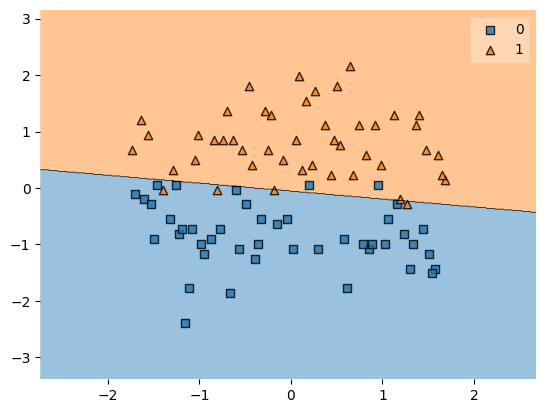

In [83]:
plot_decision_regions(X_train,Y_train.values,clf=clf)

In [84]:
#Exporting
import pickle

In [85]:
pickle.dump(clf,open('model.pkl','wb'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')